In [1]:
import matplotlib.pyplot as plt
plt.style.use("fast")
%config InlineBackend.figure_format='svg'

In [2]:
import numpy as np
import pygimli as pg
from pygimli import meshtools as mt # import a module 
from pygimli.viewer import showMesh # import a function

In [3]:
left = -1
right = 1
depth = 2

In [4]:
world = mt.createWorld(start=[left, 1], end=[right, -1], worldMarker=False)

In [5]:
circle = mt.createCircle(pos=(0, 0), radius=0.3, marker=2, boundaryMarker=5, nSegments=60)

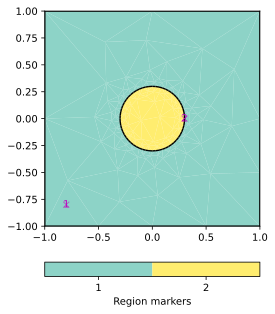

In [6]:
geometry = world + circle
pg.show(geometry);

In [7]:
mesh = mt.createMesh(geometry, area=0.005, quality=33, smooth=True)
mesh = mesh.createP2()

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1172ddc50>)

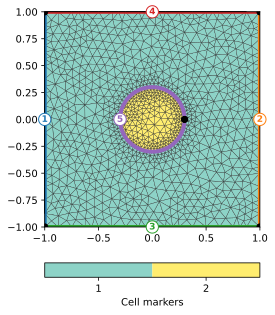

In [8]:
showMesh(mesh, boundaryMarkers=True, markers=True, showMesh=True)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1170c0250>)

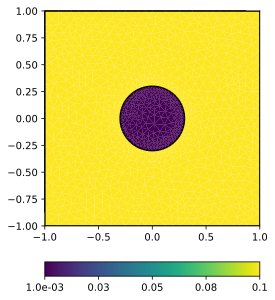

In [9]:
amap = [[1, 0.1], [2, 0.001]]
showMesh(mesh, amap)

In [10]:
bc={'Dirichlet':{1:0, 2:2}}
u = pg.solve(mesh, a=amap, bc=bc, verbose=True)

Mesh:  Mesh: Nodes: 4150 Cells: 2031 Boundaries: 3090
Assembling time:  0.047351095
Solving time:  0.03519084


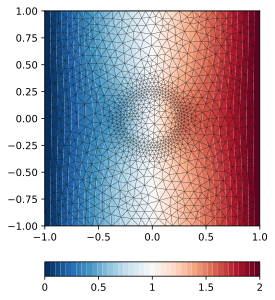

In [11]:
showMesh(mesh, data=u, showMesh=True, contourLines=False, nCols=41, cMap='RdBu_r');

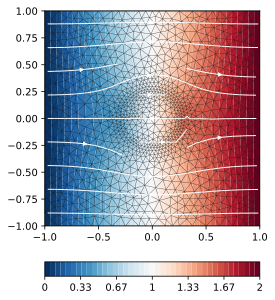

In [12]:
from pygimli.viewer.mpl import drawStreams
ax, _ = showMesh(mesh, data=u, nCols=41, nLevs=7, contourLines=False, showMesh=True, cMap='RdBu_r')
gridcoarse = pg.createGrid(x=np.linspace(-0.99, 0.99, 10),
                           y=np.linspace(-0.99, 0.99, 10))
drawStreams(ax, mesh, pg.solver.grad(mesh, u), startStream=2, coarseMesh=gridcoarse, color='white')

In [13]:
print(mesh.positions()[0:4,0])

[-1. -1.  1.  1.]


In [14]:
uhom = pg.Vector(list(map(lambda p__: p__ + 1, mesh.positions()[:, 0])))

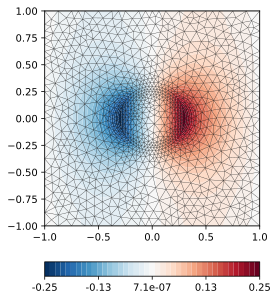

In [15]:
showMesh(mesh, data=(u-uhom), showMesh=True, nCols=41, contourLines=False, cMap='RdBu_r');